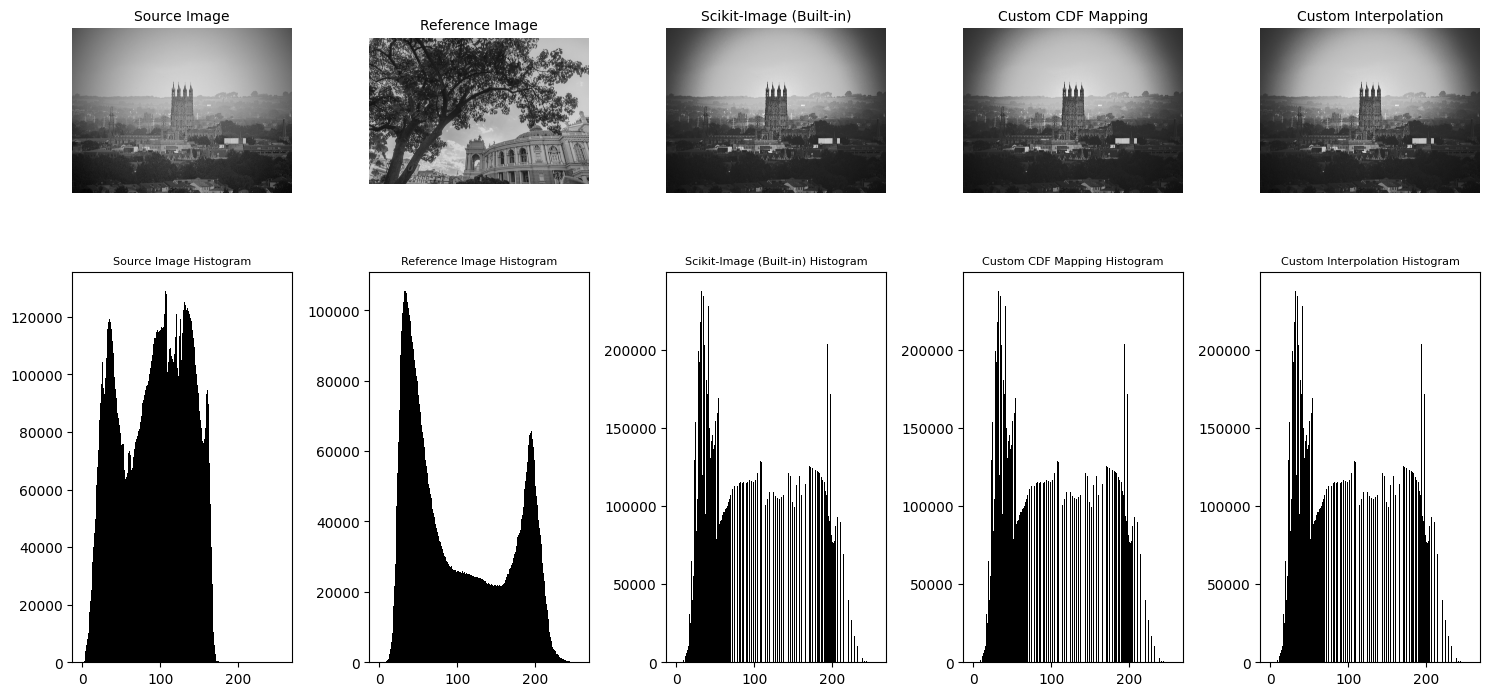

In [5]:
# CANNY
# CALE
# MORPHOLOGY
# HISTOGRAM MATCHING
# EQUALIZATION
# CONTRAST

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, img_as_ubyte
import os
# ----------------------------
# Load images
# ----------------------------
# Replace with your images
paths =os.getcwd().split(os.sep)
paths.pop()
low_contrast_img_path = os.path.join(os.sep.join(paths), 'image/low_contrast_image.jpg')
imgpath2 = os.path.join(os.sep.join(paths), 'image/high_contrast_image_1.jpg')
source = cv2.imread(low_contrast_img_path, cv2.IMREAD_GRAYSCALE)
reference = cv2.imread(imgpath2, cv2.IMREAD_GRAYSCALE)

if source is None or reference is None:
    raise FileNotFoundError("One or both image paths are incorrect or images not found.")
    exit(1)
# Convert to 8-bit grayscale if needed
source = img_as_ubyte(source / 255.0) if source.max() <= 1 else source
reference = img_as_ubyte(reference / 255.0) if reference.max() <= 1 else reference

# ----------------------------
# Built-in histogram matching (Scikit-Image)
# ----------------------------
matched_builtin = exposure.match_histograms(source, reference)


# Custom Implementation #1: CDF Mapping

def hist_match_cdf(source, reference):
    # Flatten
    src_values, bin_idx, src_counts = np.unique(source.ravel(), return_inverse=True, return_counts=True)
    ref_values, ref_counts = np.unique(reference.ravel(), return_counts=True)

    # Compute CDFs
    src_cdf = np.cumsum(src_counts).astype(np.float64)
    src_cdf /= src_cdf[-1]

    ref_cdf = np.cumsum(ref_counts).astype(np.float64)
    ref_cdf /= ref_cdf[-1]

    # Create mapping
    mapping = np.interp(src_cdf, ref_cdf, ref_values)

    # Map source image
    matched = mapping[bin_idx].reshape(source.shape)
    return matched.astype(np.uint8)

matched_cdf = hist_match_cdf(source, reference)

# ----------------------------
# Custom Implementation #2: Interpolation-based
# ----------------------------
def hist_match_interp(source, reference):
    # Get histogram and CDF of source
    src_hist, bins = np.histogram(source.flatten(), 256, [0, 256])
    src_cdf = np.cumsum(src_hist) / source.size

    # Get histogram and CDF of reference
    ref_hist, bins = np.histogram(reference.flatten(), 256, [0, 256])
    ref_cdf = np.cumsum(ref_hist) / reference.size

    # Interpolate: map src pixel values using ref CDF
    interp_values = np.interp(source.flatten(), np.arange(256), np.interp(src_cdf, ref_cdf, np.arange(256)))
    matched = interp_values.reshape(source.shape)
    return matched.astype(np.uint8)

matched_interp = hist_match_interp(source, reference)

# ----------------------------
# Plot results
# ----------------------------
titles = [
    "Source Image", 
    "Reference Image", 
    "Scikit-Image (Built-in)", 
    "Custom CDF Mapping", 
    "Custom Interpolation"
]
images = [source, reference, matched_builtin, matched_cdf, matched_interp]

plt.figure(figsize=(15, 8))
for i in range(len(images)):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i], fontsize=10)
    plt.axis("off")

    # Histogram
    plt.subplot(2, 5, i+6)
    plt.hist(images[i].ravel(), bins=256, range=(0, 256), color="black")
    plt.title(f"{titles[i]} Histogram", fontsize=8)

plt.tight_layout()
plt.show()


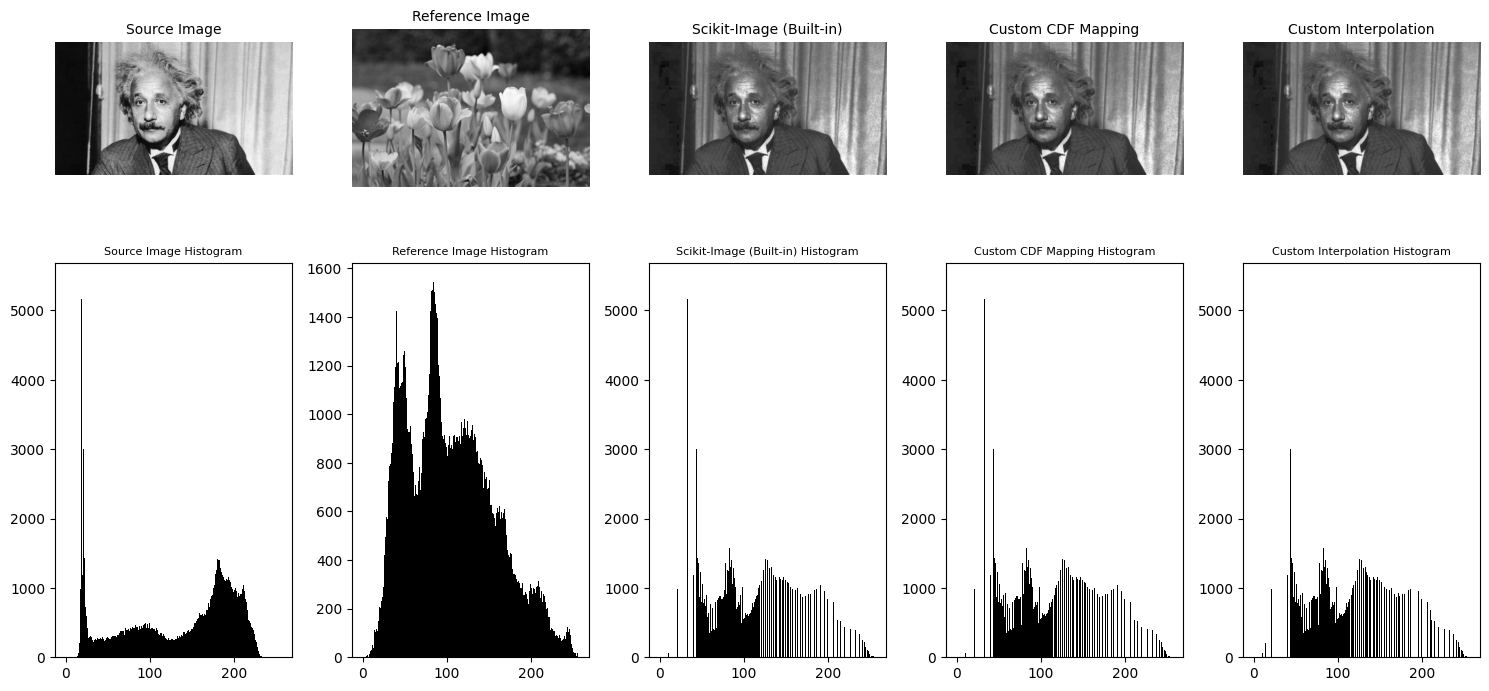

In [6]:
low_contrast_img_path = os.path.join(os.sep.join(paths), 'image/einstein.jpeg')
high_contrast_img_path = os.path.join(os.sep.join(paths), 'image/tulip.jpeg')
source = cv2.imread(low_contrast_img_path, cv2.IMREAD_GRAYSCALE)
reference = cv2.imread(high_contrast_img_path, cv2.IMREAD_GRAYSCALE)

if source is None or reference is None:
    raise FileNotFoundError("One or both image paths are incorrect or images not found.")
    exit(1)

matched_builtin = exposure.match_histograms(source, reference)
matched_cdf = hist_match_cdf(source, reference)
matched_interp = hist_match_interp(source, reference)

titles = [
    "Source Image", 
    "Reference Image", 
    "Scikit-Image (Built-in)", 
    "Custom CDF Mapping", 
    "Custom Interpolation"
]
images = [source, reference, matched_builtin, matched_cdf, matched_interp]

plt.figure(figsize=(15, 8))
for i in range(len(images)):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i], fontsize=10)
    plt.axis("off")

    # Histogram
    plt.subplot(2, 5, i+6)
    plt.hist(images[i].ravel(), bins=256, range=(0, 256), color="black")
    plt.title(f"{titles[i]} Histogram", fontsize=8)

plt.tight_layout()
plt.show()


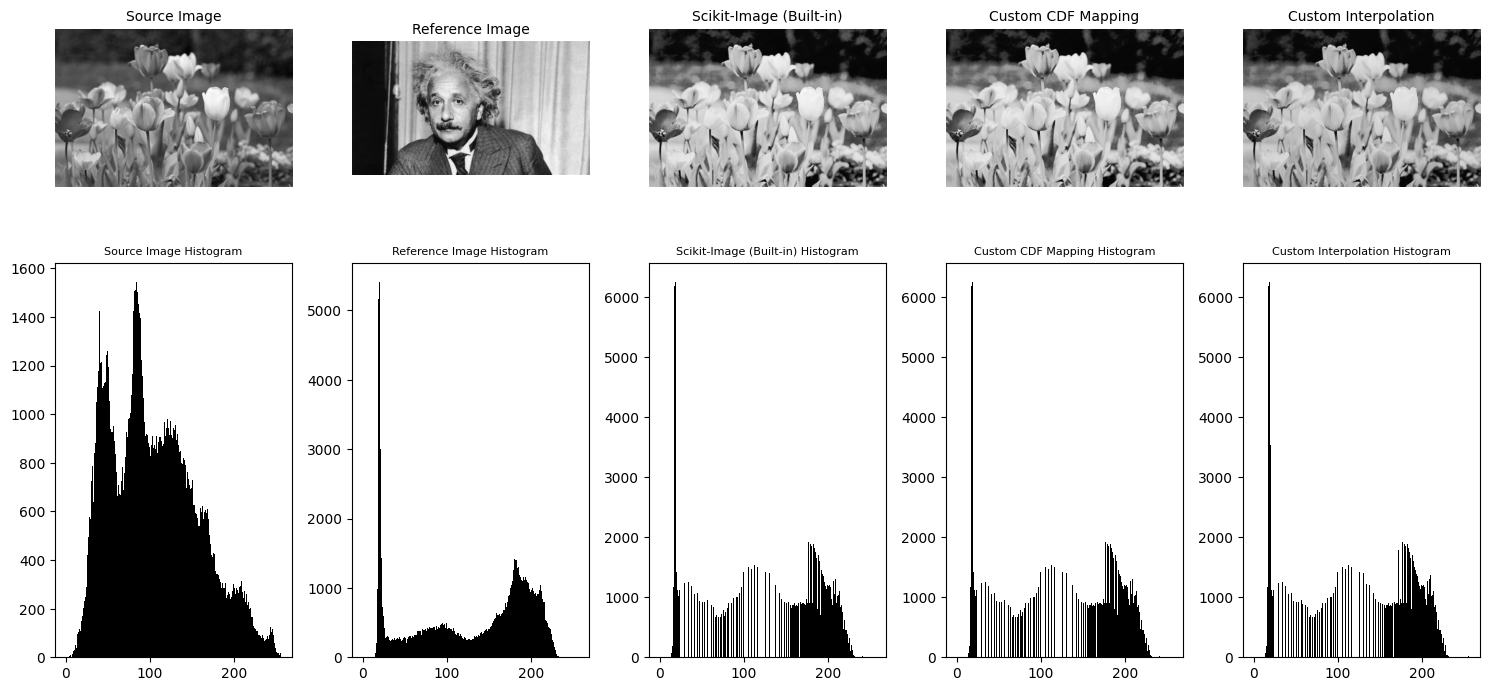

In [7]:
low_contrast_img_path = os.path.join(os.sep.join(paths), 'image/einstein.jpeg')
high_contrast_img_path = os.path.join(os.sep.join(paths), 'image/tulip.jpeg')
reference = cv2.imread(low_contrast_img_path, cv2.IMREAD_GRAYSCALE)
source= cv2.imread(high_contrast_img_path, cv2.IMREAD_GRAYSCALE)

if source is None or reference is None:
    raise FileNotFoundError("One or both image paths are incorrect or images not found.")
    exit(1)

matched_builtin = exposure.match_histograms(source, reference)
matched_cdf = hist_match_cdf(source, reference)
matched_interp = hist_match_interp(source, reference)

titles = [
    "Source Image", 
    "Reference Image", 
    "Scikit-Image (Built-in)", 
    "Custom CDF Mapping", 
    "Custom Interpolation"
]
images = [source, reference, matched_builtin, matched_cdf, matched_interp]

plt.figure(figsize=(15, 8))
for i in range(len(images)):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i], fontsize=10)
    plt.axis("off")

    # Histogram
    plt.subplot(2, 5, i+6)
    plt.hist(images[i].ravel(), bins=256, range=(0, 256), color="black")
    plt.title(f"{titles[i]} Histogram", fontsize=8)

plt.tight_layout()
plt.show()
